# An  end-to-end data analysis process--Predicting house price



   一个数据分析的流程，从大体上可以分为：数据的获取-数据的清理-初步探索（结合可视化）-模型设立/结论（取决于任务的目的，如果是为了预测，那么就需要建立模型，如果只是希望从分析过程中得到有用的见解的话，可以适当削弱建立模型的部分）。当然这些大步骤又可以细分出很多的小步骤，最终当然还是取决于数据分析所从事的具体工作内容/工作目的，以及所接触的具体数据。

## 1 initial setup
  在开始工作之前，一般需要初始设定一些东西，比如输出图片的像素、大小以及图片保存的具体位置。

In [1]:
import numpy as np
import os

# 设定一个random seed以备重复验证
np.random.seed(42)

# 改变plt的初始设定
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 设置一个保存图片到函数
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "full_process_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 2 Prepare data & simple visualization

In [2]:
import pandas as pd
House = pd.read_csv('Data/housing.csv')

In [3]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
House.describe()
#Target value is median_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


  需要好好看看我们的目标变量的特征，特别是它的normality。

((array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
          3.7703327 ,  3.98611384]),
  array([ 14999.,  14999.,  14999., ..., 500001., 500001., 500001.])),
 (110243.23228096715, 206855.8169089148, 0.9551960798030745))

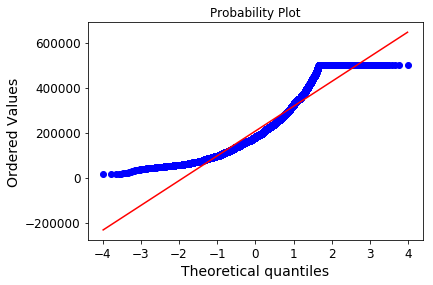

In [5]:
from scipy import stats
stats.probplot(House.median_house_value,plot=plt)

In [6]:
variance = []
skewness = []
kurtosis = []
for col in House.columns[:-1]:
    variance.append(np.var(House[col]))
    skewness.append(stats.skew(House[col]))
    kurtosis.append(stats.kurtosis(House[col]))

In [7]:
Data_Normility = pd.DataFrame({'variance':variance,
                               'skewness':skewness,
                               'kurtosis':kurtosis
                                 
})

In [8]:
Data_Normility.set_index(House.columns[:-1]).sort_values('skewness',ascending=False)

,kurtosis,skewness,variance
population,73.535009,4.935500,1.282408e+06
total_rooms,32.622732,4.147042,4.759215e+06
households,22.052354,3.410190,1.461690e+05
median_income,4.951034,1.646537,3.609148e+00
median_house_value,0.327500,0.977692,1.331550e+10
latitude,-1.117780,0.465919,4.562072e+00
housing_median_age,-0.800726,0.060326,1.583886e+02
longitude,-1.330121,-0.297780,4.013945e+00
total_bedrooms,NaN,NaN,1.775567e+05


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117dce0b8>,
      dtype=object)

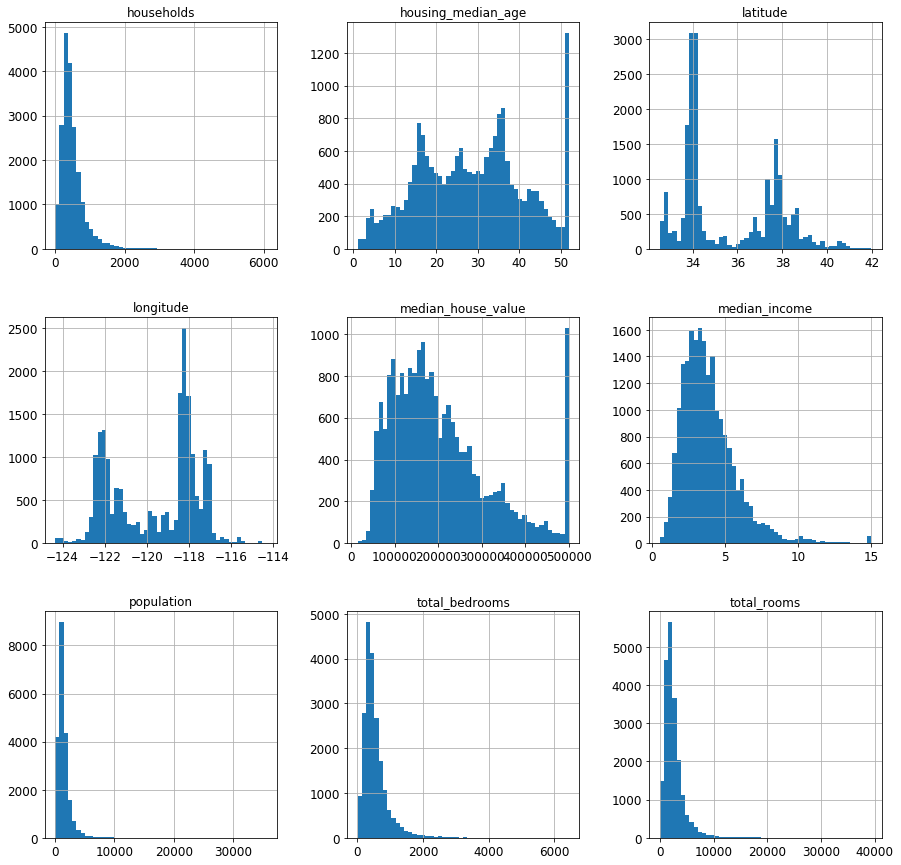

In [9]:
%matplotlib inline
import matplotlib.pylab as plt
House.hist(bins=50,figsize=(15,15))

In [10]:
corr_ma = House.corr()

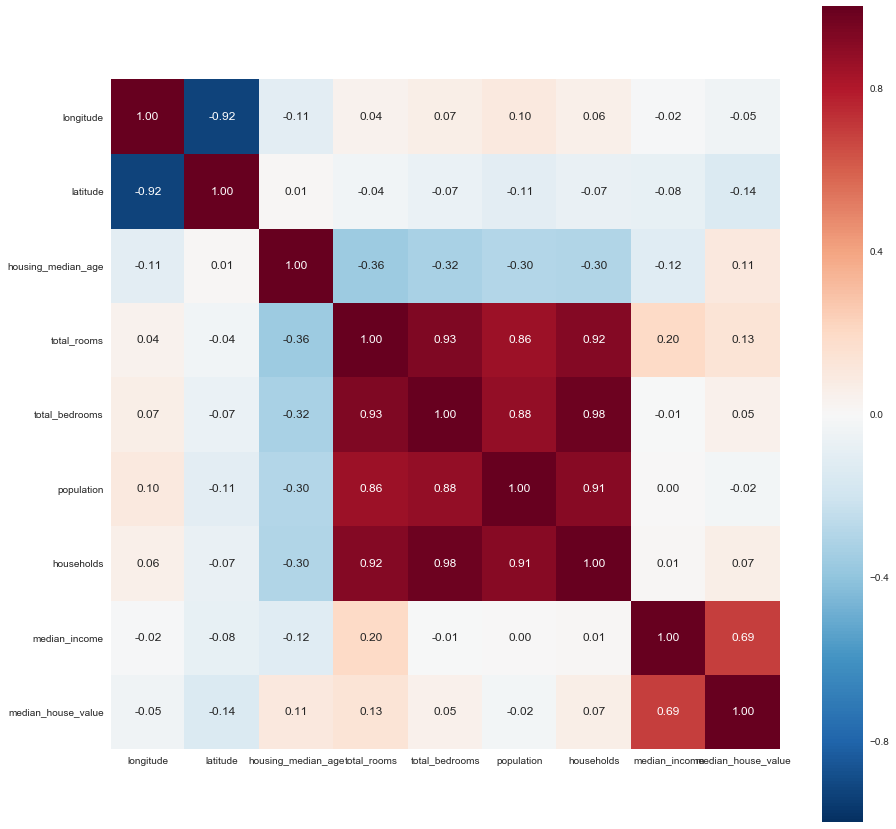

In [11]:
import seaborn as sns

plt.subplots(figsize=(15,15))
sns.heatmap(corr_ma,annot=True,fmt='.2f',square=True)

可以发现若干变量具有强烈的线形相关性，如果是进行一般的线形分析时，需要注意多重共线性的问题（系数大小未必能够直接反映变量的重要程度），如果目的单纯地只是为了预测，可以忽略。

In [12]:
#原始数据太大，有时候需要选择部分数据进行后面的可视化
index = np.array(House.index)
np.random.shuffle(index)
selection = index[:1000]

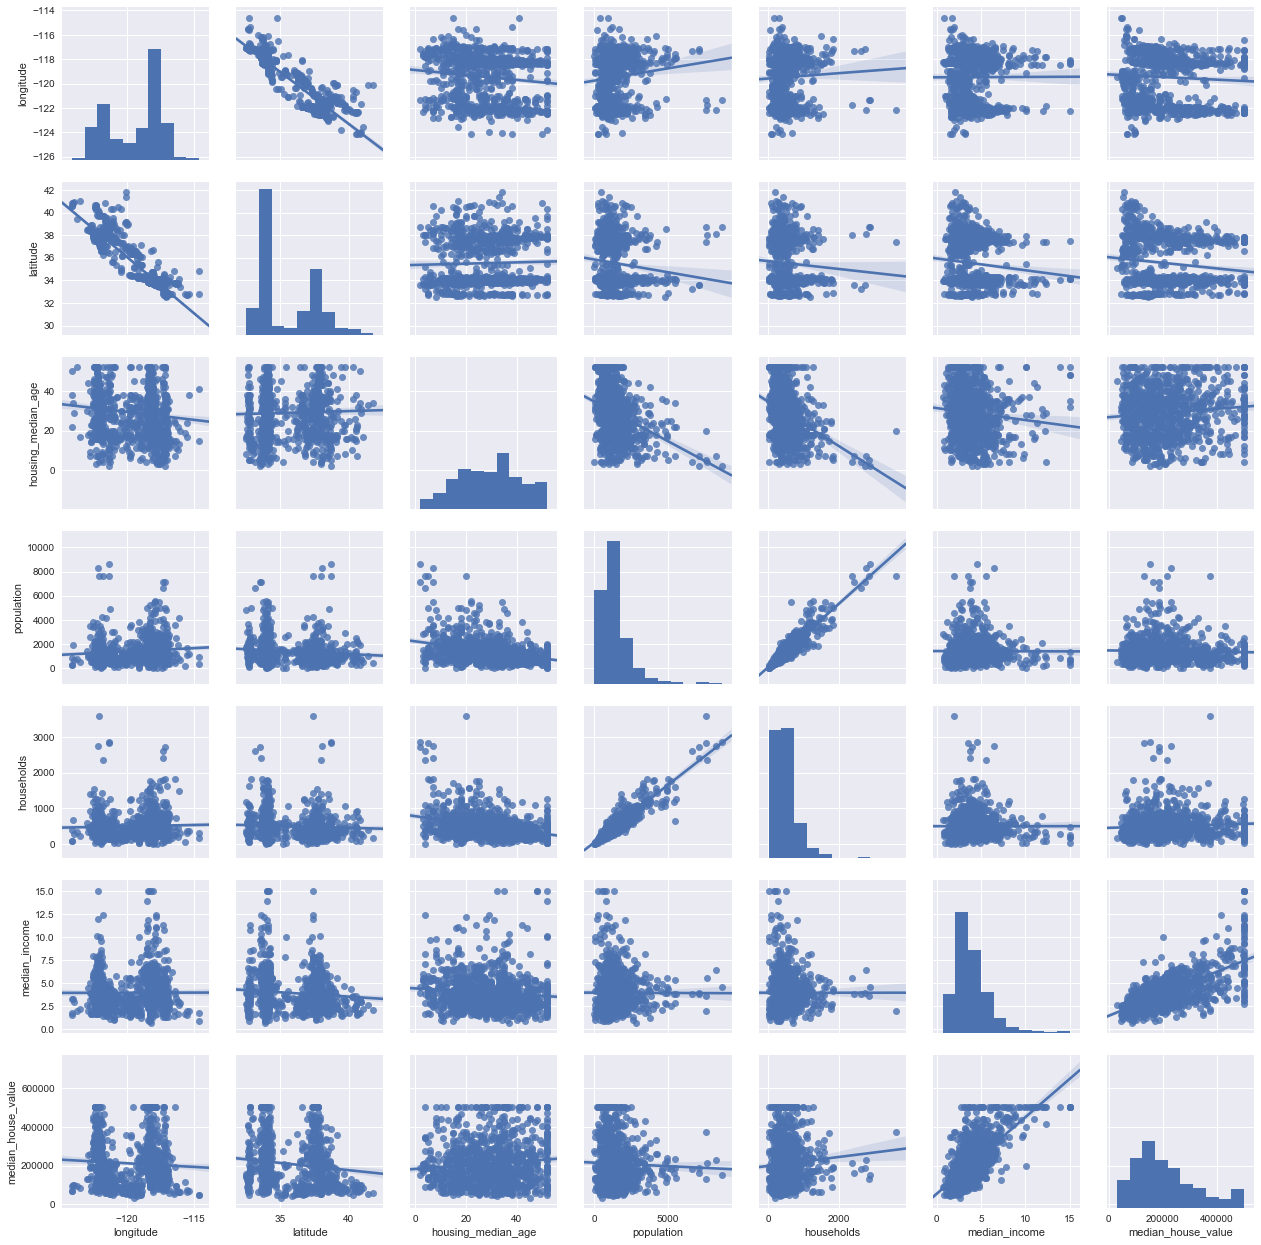

In [13]:
drop_list = ['total_rooms','total_bedrooms','ocean_proximity']
data_random = House.drop(drop_list,axis=1).iloc[selection,:]
sns.pairplot(data_random,kind='reg')
#pairplot 其实同时具有显示变量分布和相关性的作用

## 3 Data preprocessing for modeling

In [14]:
House["income_cat"] = np.ceil(House["median_income"] / 1.5)
# Label those above 5 as 5
House["income_cat"].where(House["income_cat"] < 5, 5.0, inplace=True)

In [15]:
House["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [16]:
House["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

 下面我们将原始数据通过StratifiedShuffleSplit分为train_set和test_set,然后分别对其进行数据的清洗处理（当然基于相同的pipeline，后面会讲到），其实另外一种方法就是先对整体数据尽心处理，在依据StratifiedShuffleSplit获得的index进行对数据的分割，这里我们使用前一种方法。

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

strait = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #strait split提供n对保留原有数据结构的train，test index
for train_index, test_index in strait.split(House, House["income_cat"]): #.split(X,y)
    strat_train_set = House.loc[train_index]
    strat_test_set = House.loc[test_index]

In [18]:
#prepare the X,y
X =strat_train_set.drop('median_house_value',axis=1)
y = strat_train_set['median_house_value'].copy()

In [19]:
X.isnull().any(axis=0)  
#X[X.isnull().any(axis=1)].shape[0] #158个缺失

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
income_cat            False
dtype: bool

  数值型数据的处理方式和字符型的大有不同，所以通常需要对其分别建立不同的pipeline。为此，首先要将相应的变量选取出来。

In [20]:
from sklearn.preprocessing import Imputer
#split X to numerical and catagrical data
X_num = X.drop('ocean_proximity', axis=1)
X_cat = X['ocean_proximity']

imp = Imputer(missing_values='NaN', strategy='mean')
X_num = imp.fit_transform(X_num)

In [21]:
X_num = pd.DataFrame(X_num,columns=X.columns[:-1])

In [22]:
X_num[X_num.isnull().any(axis=1)].shape[0] #没有缺失值了

0

In [23]:
#panda自带的factorize函数可以对类别型数据进行数值编码
X_cat_encoded, X_categories = X_cat.factorize()
X_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

In [24]:
#准备好用于X_num的transform 函数
#首先根据已知是增加变量的类，继承自BaseEstimator, TransformerMixin，可以适用于后面的pipline
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):  #fit(self,X,y=None)
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [25]:
#准备好选择变量类
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values #series to arra

  下面一段代码是将字符型变量按one-hot（也就是dummy）的方式进行编码的，由于sklearn的问题，所以需要一下代码，作为替代方法，可以使用pandas的get_dummy方法，具体方法在后面讲到深度学习时是会讲到。

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [27]:
#分别对X_num,X_fac构建pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = X.columns[:-2]
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([   #list of tuples,the easy way is make_pipeline
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [28]:
#构建full——pieline
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [29]:
House_prepared = full_pipeline.fit_transform(X)

In [30]:
House_prepared.shape

(16512, 16)

## 4 Select a model

In [31]:
#通常可以将一般线性模型作为我们的baseline
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(House_prepared, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#train_error
from sklearn.metrics import mean_squared_error
predict_lin = lin_reg.predict(House_prepared)
lin_train_error = np.sqrt(mean_squared_error(y,predict_lin))#train error

In [33]:
#let us find the cross_val_score of the lin_reg model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, House_prepared, y, #base one the train data set
                         scoring="neg_mean_squared_error", cv=10)
lin_cross_error = np.sqrt(-scores).mean()

In [34]:
lin_train_error,lin_cross_error #差距不大

(68628.19819848923, 69052.46136345083)

In [35]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(House_prepared, y) #这里有很多参数，可以选择使用grid serch完成

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [36]:
#train_error
predict_tree = tree_reg.predict(House_prepared)
tree_train_error = np.sqrt(mean_squared_error(y,predict_tree))

In [37]:
#cross_val_error
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, House_prepared, y, #base one the train data set
                         scoring="neg_mean_squared_error", cv=10)
tree_cross_error = np.sqrt(-scores).mean()
tree_train_error,tree_cross_error #可以看到决策树的train_error接近为0，而cross_val_score却要高于线形模型(VC——dimension过高)，
#所以是明显过拟合的（主要是min_sample_leaf这个参数的预设值为1）

(0.0, 70644.94463282847)

## 5  Fine-Tune the model

  为了提升模型在test_set的表现，我们需要在原有的模型急促上加上penalty项，比如呀可以采用Lasso_regression来替代原有的模型。但是，lasso回归需要一个alpha参数，这可以通过gridsearchCV获得。

In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso()
params = [{'alpha':np.linspace(1e-4,1e-1,30)}]

In [39]:
from sklearn.model_selection import GridSearchCV
lasso_cv = GridSearchCV(lasso,params,cv=5,scoring ='neg_mean_squared_error',return_train_score=True)

In [40]:
lasso_cv.fit(House_prepared,y)

/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: 

/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: 

/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: 

/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: 

/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: 

/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: 

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([0.0001 , 0.00354, 0.00699, 0.01043, 0.01388, 0.01732, 0.02077,
       0.02421, 0.02766, 0.0311 , 0.03455, 0.03799, 0.04144, 0.04488,
       0.04833, 0.05177, 0.05522, 0.05866, 0.06211, 0.06555, 0.069  ,
       0.07244, 0.07589, 0.07933, 0.08278, 0.08622, 0.08967, 0.09311,
       0.09656, 0.1    ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [41]:
lasso_cv.best_params_

{'alpha': 0.1}

In [42]:
lasso_cv.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
cvres = lasso_cv.cv_results_ #cv_results 存储了所有结果
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params) #差别好像不大

69146.94954975069 {'alpha': 0.0001}
69146.94687925723 {'alpha': 0.0035448275862068964}
69146.9442124178 {'alpha': 0.006989655172413793}
69146.94154923242 {'alpha': 0.010434482758620689}
69146.93888970108 {'alpha': 0.013879310344827585}
69146.93623382376 {'alpha': 0.017324137931034482}
69146.9335816005 {'alpha': 0.02076896551724138}
69146.93093303128 {'alpha': 0.024213793103448275}
69146.9282881161 {'alpha': 0.02765862068965517}
69146.92564685497 {'alpha': 0.031103448275862068}
69146.9230092479 {'alpha': 0.03454827586206897}
69146.92037529484 {'alpha': 0.03799310344827586}
69146.91774499584 {'alpha': 0.04143793103448276}
69146.91511835087 {'alpha': 0.04488275862068966}
69146.91249535995 {'alpha': 0.048327586206896554}
69146.9098760231 {'alpha': 0.05177241379310345}
69146.90726034026 {'alpha': 0.05521724137931035}
69146.9046483115 {'alpha': 0.05866206896551725}
69146.90203993676 {'alpha': 0.06210689655172414}
69146.89943521607 {'alpha': 0.06555172413793103}
69146.89683414943 {'alpha': 0.

In [44]:
lasso_best = lasso_cv.best_estimator_

In [45]:
#train error
lasso_predict = lasso_best.predict(House_prepared)
lasso_train_error = np.sqrt(mean_squared_error(y,lasso_predict))

In [46]:
#lasso cross_val_error
score = cross_val_score(lasso_best,House_prepared,y,cv=10,scoring='neg_mean_squared_error')

/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jiangchaodi/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: 

In [47]:
lasso_cross_error = np.sqrt(-score).mean()
lasso_train_error,lasso_cross_error #其实改进也不大

(68628.19880703553, 69052.42265773652)

## 6 Summary

  我们来回顾一下这个预测房价（回归问题）的整个流程:  
  1、进行初始的设定，比如对修改plt的rcParams中的一些参数，以及设置保存图片的函数及路径等。  
  2、读取数据、观察数据（变量信息以及缺失值），清洗数据（部分可以放在第三步的pipline中进行）以及可视化数据来获得对数据的全面认知。  
  3、为了后面的模型训练，对数据进行进一步的准备。主要包括，将数据通过stratfieldshuffle的方法（保留原有数据结构）来将数据分为训练集  和测试集，当然在数据量足够大的情况下也可以使用train_test_split的方法。      
   然后，将数据集分为数值型数据和类别型数据（因为两者的处理方法是不一样的，比如处理缺失值的Imputer只能作用在数值型数据上），然后分别:  
  构建pipeline，然后可以是使用Featureunion将两个pipeline合并成一个。另外很重要的一点，可以通过继承BaseEstimator, TransformerMixin两个父类，可以构建，自己的数据处理类，就像standscaler一样，具有fit_transform函数，可以使用于pipeline中。  
  4、选择适当的模型进行训练。为了验证模型效果，需要有一个base model，比如这里的OLS模型。另外，除了获取模型在训练集上的训练效果以外，还需要得到一个cross_val_score（在训练集上）。因为有些模型会发生过拟合（overfitting），比如这里的决策树模型。一般来说，cross_val_score明显较小的话，则在新的数据集上的预测效果也会更好。  
  5、个别模型往往需要选择参数，比如lasso回归的alpha，所以可以选择gridserach的方法（当然也可以是randomsearch）来获取最好的参数。  
  最后其实还需要在test数据上验证训练效果（在下一篇会用到更为先进的方法）。  
  